<h1> Adaptation of Materialistic Value Scale to Bangladeshi Culture </h1>

<h3>Reliability</h3>

1.     We will assess reliability using Cronbach's Coefficient Alpha for the MVS_b (Materialistic Value Scale Bangla).
2.     We will conduct item analysis.
3.     Test-Retest reliability test

<h3>Validity</h3>

1.     To evaluate convergent validity, we will examine the relationship between Materialism and Depression.
2.     To assess discriminant validity, we will examine the relationship between Life Satisfaction and Materialism.

<h3>CFA (Confirmatory Factor Analysis)</h3>

1.     We will employ SEM to conduct Confirmatory Factor Analysis.

In [1]:
import pandas as pd
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt
import semopy as sem
import pingouin as pg
df = pd.read_csv('MVS_data.csv')

In [2]:
df.shape

(290, 17)

<h2> Reliability </h2>

In [3]:
mvs = df.iloc[:,2:17]

In [5]:
alpha, ci = pg.cronbach_alpha(mvs)
print("Cronbach's Alpha : ", alpha)

Cronbach's Alpha :  0.7687737332349411


In [6]:
item_difficulty = mvs.mean()
item_discrimination = mvs.corrwith(mvs.sum(axis=1))
item_total_corr = mvs.corrwith(mvs.sum(axis=1))

item_stats = pd.DataFrame({
    'Item': item_difficulty.index,
    'Difficulty': item_difficulty.values,
    'Discrimination': item_discrimination.values,
    'Item-Total Correlation': item_total_corr.values
})



In [7]:
item_stats

,Item,Difficulty,Discrimination,Item-Total Correlation
0,MVS_1,2.910345,0.470767,0.470767
1,MVS_2,2.903448,0.527817,0.527817
2,MVS_3,2.917241,0.505655,0.505655
3,MVS_4,2.900000,0.534006,0.534006
4,MVS_5,2.886207,0.493239,0.493239
5,MVS_6,2.986207,0.432793,0.432793
6,MVS_7,3.048276,0.434496,0.434496
7,MVS_8,3.000000,0.487055,0.487055
8,MVS_9,3.044828,0.507885,0.507885
9,MVS_10,2.982759,0.478324,0.478324


<h3>Result </h3>

> Cronbach Alpha of our adapted Materialism Value Scale is 0.77 which is considered moderately good reliability.
> Item statistics show that each item has positive and significant correalation with the total

<h2>Validity</h2>

C:\Users\DELL\AppData\Local\Temp\ipykernel_1752\3529245761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['mvs_total'] = mvs.sum(axis=1)


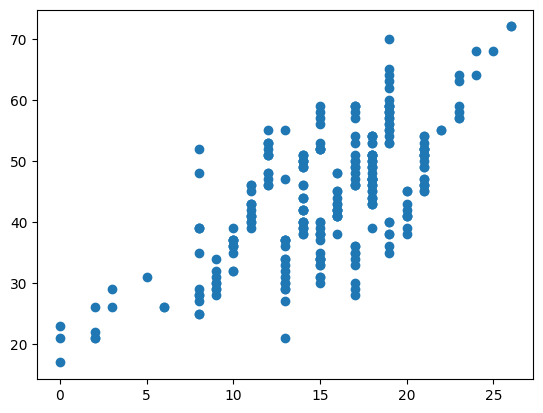

In [9]:
ndf = df[['Depression','Life_Satisfaction']]
ndf['mvs_total'] = mvs.sum(axis=1)
plt.scatter(ndf['Depression'],ndf['mvs_total'])

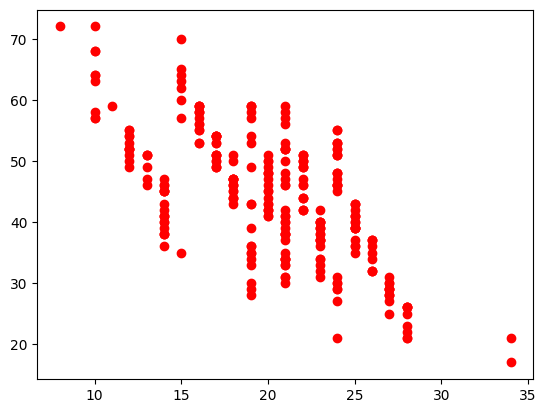

In [10]:
plt.scatter(ndf['Life_Satisfaction'],ndf['mvs_total'], color = 'red')

In [11]:
stat.pearsonr(ndf['Depression'],ndf['mvs_total'])

PearsonRResult(statistic=0.6815140328405543, pvalue=6.061175239807621e-41)

In [12]:
stat.pearsonr(ndf['Life_Satisfaction'],ndf['mvs_total'])

PearsonRResult(statistic=-0.6665132396880822, pvalue=1.2882042661674804e-38)

<h2>CFA</h2>

In [13]:
mod = """

Success =~ MVS_1 + MVS_2 + MVS_3 + MVS_4 + MVS_5
Centrality =~ MVS_6 + MVS_7 + MVS_8 + MVS_9 + MVS_10
Happiness =~ MVS_11 + MVS_12 + MVS_13 + MVS_14 + MVS_15

Materialism =~  Happiness + Success +Centrality 

"""

model = sem.Model(mod)
model.fit(df)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Happiness,~,Materialism,1.000000,-,-,-
1,Success,~,Materialism,0.019139,0.720969,0.026546,0.978822
2,Centrality,~,Materialism,-0.170326,6.414869,-0.026552,0.978817
3,MVS_1,~,Success,1.000000,-,-,-
4,MVS_2,~,Success,1.030866,0.055684,18.512727,0.0
5,MVS_3,~,Success,0.974025,0.054435,17.89344,0.0
6,MVS_4,~,Success,1.047252,0.055687,18.806112,0.0
7,MVS_5,~,Success,0.937832,0.054739,17.132644,0.0
8,MVS_6,~,Centrality,1.000000,-,-,-
9,MVS_7,~,Centrality,1.133986,0.073577,15.412332,0.0


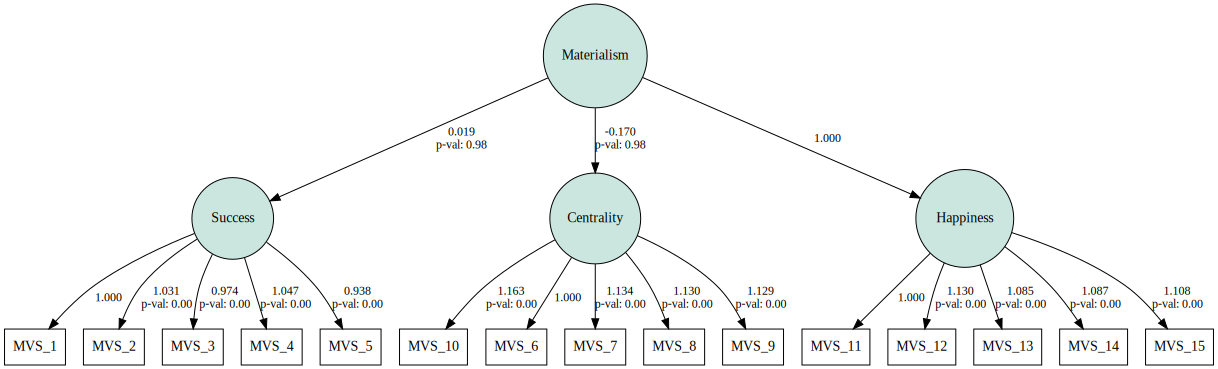

In [14]:
sem.semplot(model, filename = 'MVS sem.pdf')

In [16]:
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,87,105,104.376932,0.098804,3490.554065,0.994867,0.970097,0.963911,0.970097,0.993805,0.026289,65.280159,186.38623,0.35992


<h3>Result </h3>

Our model's chi-square test (chi2) yields a value of 104.38 with 87 degrees of freedom, accompanied by a non-significant chi-square p-value (chi2 p-value = 0.0988). This signifies that our model does not significantly differ from the observed data, a reassuring finding.

Furthermore, our model's chi-square value (chi2) is notably lower than the baseline chi-square value (chi2 Baseline = 3490.55), indicating a substantial enhancement in model fit.

Additional fit indices corroborate the goodness of fit of our model. The Comparative Fit Index (CFI), Goodness of Fit Index (GFI), Adjusted Goodness of Fit Index (AGFI), Normed Fit Index (NFI), and Tucker-Lewis Index (TLI) all approximate or exceed the widely accepted threshold of 0.95, signifying a commendable fit. Moreover, the Root Mean Square Error of Approximation (RMSEA) registers a low value of 0.0263, further affirming our model's adequacy.

Furthermore, both the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) present low values (AIC = 65.28, BIC = 186.39), signifying that our model attains an appealing equilibrium between complexity and fit. The log-likelihood value (0.3599) underscores our model's capacity to predict the observed data effectively.